In [5]:
import numpy as np
from umap import UMAP
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load in the data

In [6]:
DEP_COL = "_HYPNO-mode"

# Utility functions to load in the data
dataset = np.load("sc-agg-f16.npz")

# Create a reproducible sample of rows from the given set
def generate_sample(size_per, set_name="train_patients", random_state=42):
    # Set up the random state & the row storage
    r = np.random.RandomState(random_state)
    rows = []

    # Loop through each person in the named set and select that number of rows, randomly
    for entry in dataset[set_name]:
        entry_set = dataset[entry]
        to_get = size_per if type(size_per) is int else int(size_per * entry_set.shape[0])
        selection = r.choice(range(entry_set.shape[0]), size=to_get, replace=False)
        rows.extend(entry_set[selection])

    # Return the sample and the labels
    return np.array(rows, dtype=float), dataset["labels"]

# Convert a sample to X and y pairs, with numeric values in the place of NaNs
def to_xy_numeric(sample, labels):
    dep_col_idx = np.where(labels == DEP_COL)[0]
    X = np.delete(sample, dep_col_idx, axis=1)
    y = sample[:, dep_col_idx]
    y[np.isnan(y)] = 6
    return X, y

## Function to run several projections instead of just one

In [43]:
# Define a function of several reductions
def clustering_test(X_in, y, dim_list, file_out, n_neighbors):
    print(f"Running {dim_list}...")
    X = X_in
    for dims, epochs in dim_list:
        print(f"...dim {dims}, {epochs} epochs...")
        X = UMAP(n_components=dims, n_epochs=epochs, init="pca", n_neighbors=n_neighbors, n_jobs=-1).fit_transform(X, y)
    np.save(f"test-projections/{file_out}.npy", X)
    print(f"Saved.")
    return X, y

# Plot the result of a clustering test
def plot_result(X, y):
    dims = X.shape[1]
    if dims == 2:
        plt.scatter(*X.T, c=y, cmap="rainbow", marker=".", alpha=0.1)
        plt.show()
    else:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(*X.T, c=y, cmap="rainbow", marker=".", alpha=0.1)
        plt.show()

# Load in a part of the dataset and the full dataset
X, y = to_xy_numeric(*generate_sample(1., random_state=29))
X_p, y_p = to_xy_numeric(*generate_sample(.1, random_state=2))
np.save("test-projections/y.npy", y)

Running [(2, 200)]...
...dim 2, 200 epochs...
Saved.


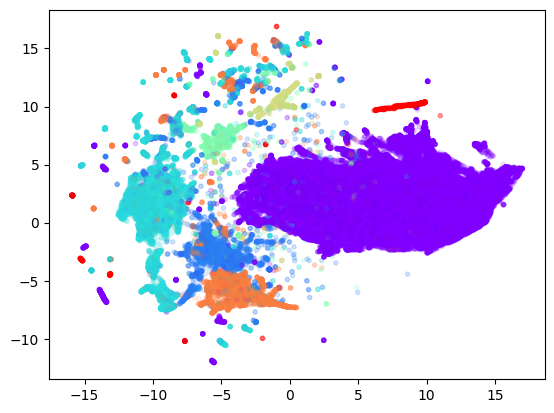

In [44]:
plot_result(*clustering_test(X, y, [(2, 200)], "initial-test", 10))

Running [(2, 500)]...
...dim 2, 500 epochs...
Saved.


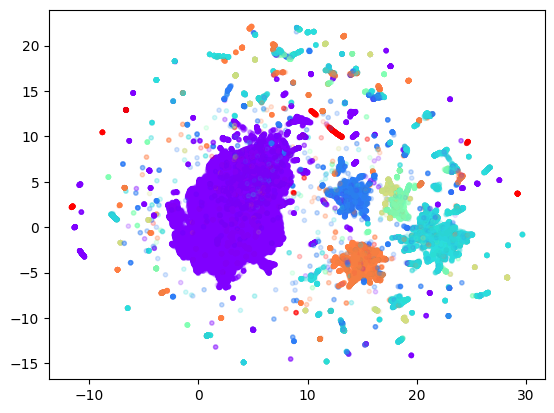

In [37]:
plot_result(*clustering_test(X, y, [(2, 500)], "initial-test", 10))

Running [(2, 200)]...
...dim 2, 200 epochs...
Saved.


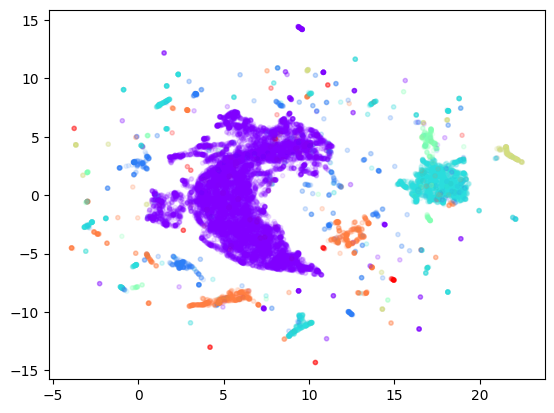

In [10]:
plot_result(*clustering_test(X_p, y_p, [(2, 200)], "initial-test", 10))

Running [(2, 200)]...
...dim 2, 200 epochs...
Saved.


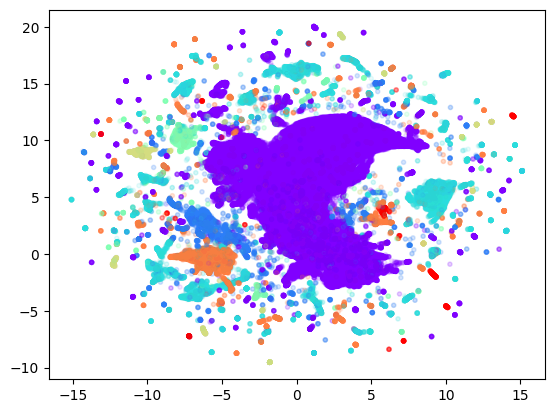

In [11]:
plot_result(*clustering_test(X, y, [(2, 200)], "initial-test", 10))

Running [(3, 2000), (2, 2000)]...
...dim 3, 2000 epochs...
...dim 2, 2000 epochs...
Saved.


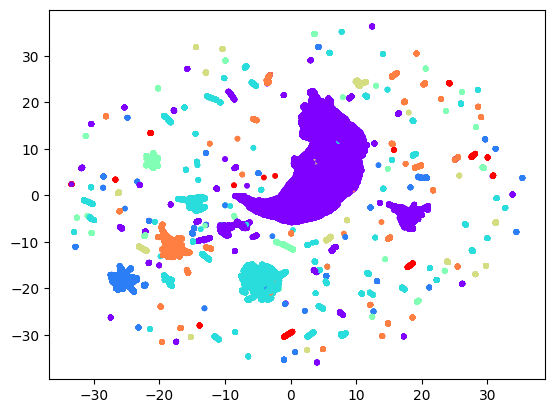

In [5]:
plot_result(*clustering_test(X, y, [(3, 2000), (2, 2000)], "full-3d-to-2d", 50))

Running [(5, 5000), (2, 5000)]...
...dim 5, 5000 epochs...
...dim 2, 5000 epochs...
Saved.


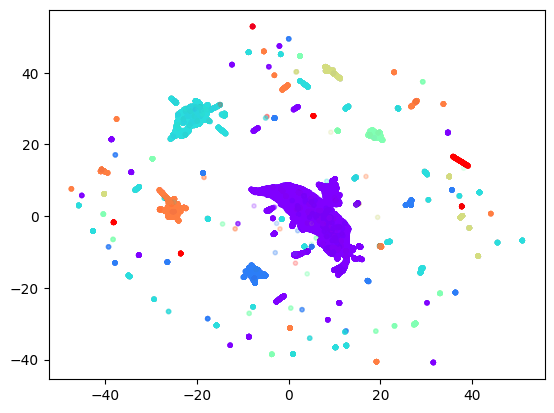

In [14]:
plot_result(*clustering_test(X, y, [(5, 5000), (2, 5000)], "5to2", 100))

Running [(5, 250), (2, 250)]...
...dim 5, 250 epochs...
...dim 2, 250 epochs...
Saved.


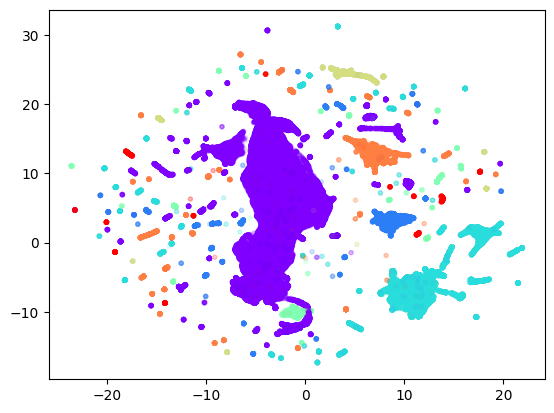

In [8]:
plot_result(*clustering_test(X, y, [(5, 250), (2, 250)], "5to2-fast", 100))

Running [(5, 5000), (3, 5000)]...
...dim 5, 5000 epochs...
...dim 3, 5000 epochs...
Saved.


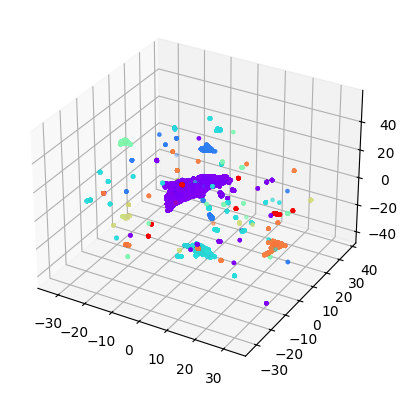

In [15]:
plot_result(*clustering_test(X, y, [(5, 5000), (3, 5000)], "initial-5to3", 100))

Running [(5, 5000), (2, 5000)]...
...dim 5, 5000 epochs...
...dim 2, 5000 epochs...
Saved.


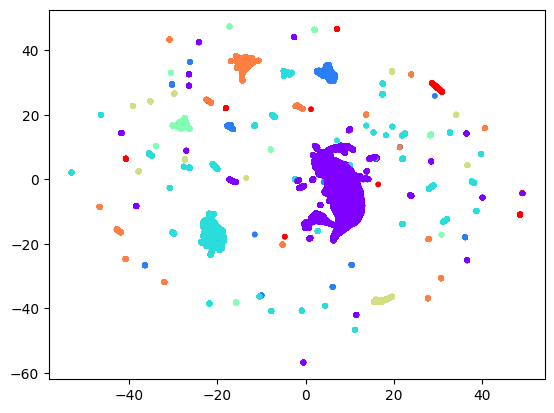

In [7]:
plot_result(*clustering_test(X, y, [(5, 5000), (2, 5000)], "initial-test", 150))

Running [(2, 1000), (2, 1000)]...
...dim 2, 1000 epochs...
...dim 2, 1000 epochs...
Saved.


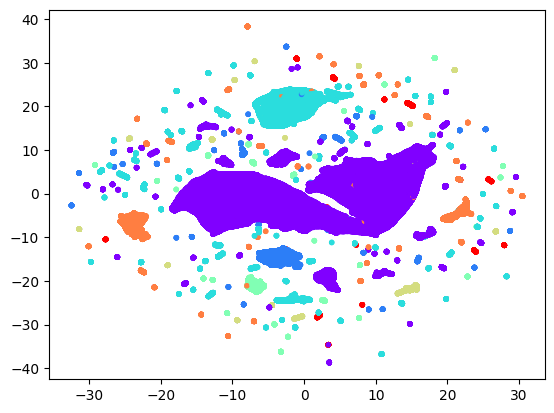

In [8]:
plot_result(*clustering_test(X, y, [(2, 1000), (2, 1000)], "initial-test", 60))